# 10: Plotting and Visualisation

This week has no programming, we are just going to switch to **python**
to practice plotting and visualisation.

It is impossible to do interesting programming without looking at the numbers coming out of the calculation, a plot or some other way of looking at the data is important.

C has many very sophisticated graphics libraries, however the quickest way to get started is to use **matplotlib** which is shipped with python.

This notebook assumes that you have some example data files, some with format *.xyz* (containing arrangements of atoms) and some with format *.txt* containing text in columns.

To use matplotlib, switch the kernel in your notebook to python3.


## Python tips

1) Python code is turned into C code behind the scenes: anything you can do in C can therefore be done in python without too much effort.

2) Whitespace matters in python.  Instead of curly brackets, we just indicate for loops etc using indentation

3) No semicolons are needed: lines end when they end unless continued with a slash.

Below I'm going to load some data and make a plot:


In [1]:
# This cell should only be run if you don't have the nice interactive
# plotting library ipympl already loaded.

'''
import sys
!conda install --yes --prefix {sys.prefix} ipympl
'''

##comment it in to use it, and out again when you are done.

Solving environment: done

## Package Plan ##

  environment location: /home/louis/miniconda3

  added / updated specs:
    - ipympl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    brotli-1.0.9               |       he6710b0_2         375 KB
    ca-certificates-2022.4.26  |       h06a4308_0         124 KB
    conda-4.12.0               |   py39h06a4308_0        14.5 MB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    giflib-5.2.1               |       h7b6447c_0          78 KB
    intel-openmp-2021.4.0      |    h06a4308_3561         4.2 MB
    ipympl-0.8.7               |     pyhd3eb1b0_0         202 KB
    kiwisolver-1.3.2           |   py39h295c915_0          80 KB
    lcms2-2.12                 |       h3be6417_0         312 KB
    li

In [2]:
# This cell should only be run if you don't have the aesthetically pleasing 
# plotting library "seaborn" already installed


import sys
!conda install -c conda-forge --yes --prefix {sys.prefix} seaborn




##comment it in to use it, and out again when you are done.

Solving environment: done

## Package Plan ##

  environment location: /home/louis/miniconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py39hf3d152e_2         145 KB  conda-forge
    conda-4.12.0               |   py39hf3d152e_0        1014 KB  conda-forge
    libgfortran-ng-7.5.0       |      h14aa051_20          23 KB  conda-forge
    libgfortran4-7.5.0         |      h14aa051_20         1.2 MB  conda-forge
    openssl-1.1.1n             |       h166bdaf_0         2.1 MB  conda-forge
    pandas-1.4.2               |   py39h1832856_1        12.5 MB  conda-forge
    patsy-0.5.2                |     pyhd8ed1ab_0         188 KB  conda-forge
    pytz-2022.1                |     pyhd8ed1ab_0         242 KB  conda-forge
    scipy-1.7.3                |   py39hc147768_0        16.9 MB
    seaborn-0.11.2             

Over whole series at T=2.00, <U>=-0.04
Over whole series at T=1.00, <U>=-0.05
Over whole series at T=0.50, <U>=-0.07
Over whole series at T=0.00, <U>=-1.62


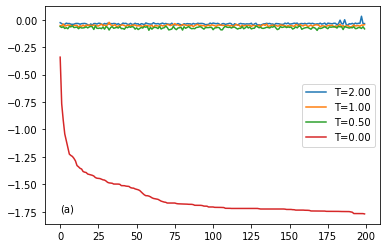

In [48]:
import matplotlib.pyplot as plt  ##bring in the plotting library
import numpy as np               ##numpy: numerical python

def load_Useries(fname):
    """
    Just a quick function to grab data out of MC_U.txt
    """
    f = open(fname)
    USets = [[]]   #create a list with an empty list in it
    TVals = [0]
    for line in f: #loop over the file by lines.
        L = line.split() #split the line into a list of words/numbers
        if len(L) == 3:  #check the list length
            U = L[2]
            USets[-1].append(float(U))
            TVals[-1] = float(L[1])
        elif len(USets[-1]) > 0:
            USets.append([])
            TVals.append(0.)
            
    if len(USets[-1]) == 0: USets = USets[:len(USets)-1]
        
    return np.array(USets, dtype=object), np.array(TVals, dtype=object)

datasets, TVals = load_Useries("MC_U.txt")

for dset, T in zip(datasets, TVals):
    tpoints = np.arange(len(dset))
    
    ###this 2D plotting command is pretty easy
    print("Over whole series at T=%.2f, <U>=%.2f" %\
                        (T, np.mean(dset)))
    plt.plot(tpoints, dset, label="T=%.2f" % T)


##we can do other things
plt.legend() ##show the legend box

##show the plot when it is finished
plt.show()



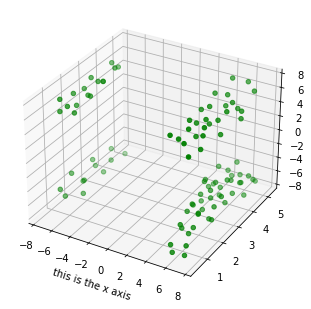

In [4]:
## Just to be fancy, here is an interactive 3D plot of an LJ structure

##Update: this doesn't work for me, I see nothing.

# instruction to jupyter server for creating a responsive plot
#
#%matplotlib widget 

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def loadXYZ_series(fileName):
    """
    Quick utility function to load a .xyz
    """
    f        = open(fileName, "r")
    coordSet = []
    for line in f:
        L = line.split()
        if len(L) == 1:
            N = int(L[0])
            coordSet.append( np.zeros((N,3)) )
            c = 0
        if len(L) == 4 and c < N:
            x,y,z = float(L[1]), float(L[2]), float(L[3])
            coordSet[-1][c,0] = x
            coordSet[-1][c,1] = y
            coordSet[-1][c,2] = z
            c += 1
            
    return coordSet

# creating figure
fig = plt.figure()
ax  = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

coordSet = loadXYZ_series("MC_T0.00.xyz")
xset     = coordSet[-1][:,0]
yset     = coordSet[-1][:,1]
zset     = coordSet[-1][:,2]

ax.scatter(xset, yset, zset, color='green')

plt.ion()
plt.show()

## Assignment, week 10: Practice plots

This exercise is just to load the example data from "MC_U.txt" and display it in a nice way.  Just google how to do all this stuff, or look at example code above.

1) Add proper axis labels to the 2D plot.

2) Estimate $<U>$ for each $T$ and show the value as a horizontal line the same color as the trace.  

3) Add a the **bold** text "**(a)**" in the bottom left-hand corner.

4) Read this: https://seaborn.pydata.org/tutorial/color_palettes.html and impose an appropriate and pleasing colour palette on the plot.

5) Output the plot as a pdf.

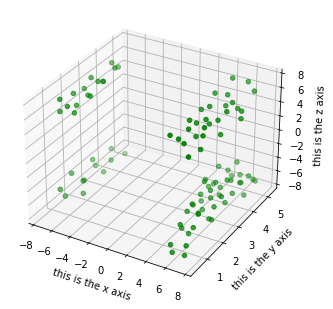

In [10]:
## Just to be fancy, here is an interactive 3D plot of an LJ structure

##Update: this doesn't work for me, I see nothing.

# instruction to jupyter server for creating a responsive plot
#
#%matplotlib widget 

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def loadXYZ_series(fileName):
    """
    Quick utility function to load a .xyz
    """
    f        = open(fileName, "r")
    coordSet = []
    for line in f:
        L = line.split()
        if len(L) == 1:
            N = int(L[0])
            coordSet.append( np.zeros((N,3)) )
            c = 0
        if len(L) == 4 and c < N:
            x,y,z = float(L[1]), float(L[2]), float(L[3])
            coordSet[-1][c,0] = x
            coordSet[-1][c,1] = y
            coordSet[-1][c,2] = z
            c += 1
            
    return coordSet

# creating figure
fig = plt.figure()
ax  = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

coordSet = loadXYZ_series("MC_T0.00.xyz")
xset     = coordSet[-1][:,0]
yset     = coordSet[-1][:,1]
zset     = coordSet[-1][:,2]

ax.scatter(xset, yset, zset, color='green')
ax.set_xlabel("this is the x axis")
ax.set_ylabel("this is the y axis")
ax.set_zlabel("this is the z axis")

plt.ion()
plt.show()

Over whole series at T=2.00, <U>=-0.04
Over whole series at T=1.00, <U>=-0.05
Over whole series at T=0.50, <U>=-0.07


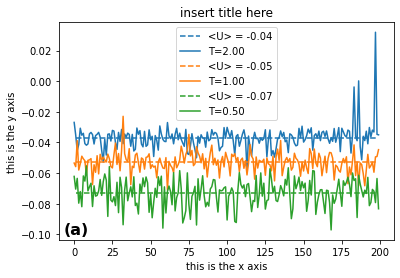

In [118]:
import matplotlib.pyplot as plt  ##bring in the plotting library
import numpy as np               ##numpy: numerical python
import seaborn as sns

def load_Useries(fname):
    """
    Just a quick function to grab data out of MC_U.txt
    """
    f = open(fname)
    USets = [[]]   #create a list with an empty list in it
    TVals = [0]
    for line in f: #loop over the file by lines.
        L = line.split() #split the line into a list of words/numbers
        if len(L) == 3:  #check the list length
            U = L[2]
            USets[-1].append(float(U))
            TVals[-1] = float(L[1])
        elif len(USets[-1]) > 0:
            USets.append([])
            TVals.append(0.)
            
    if len(USets[-1]) == 0: USets = USets[:len(USets)-1]
        
    return np.array(USets, dtype=object), np.array(TVals, dtype=object)

datasets, TVals = load_Useries("MC_U.txt")

palette = sns.color_palette("tab10")
colorpalette = iter(palette)

for dset, T in zip(datasets, TVals):
    if (T != 0):
        tpoints = np.arange(len(dset))
        colorset = next(colorpalette)
        ###this 2D plotting command is pretty easy
        print("Over whole series at T=%.2f, <U>=%.2f" %\
                            (T, np.mean(dset)))
        plt.axhline(np.mean(dset),xmin = 0.05, xmax = 0.95,label='<U> = %.2f' % np.mean(dset),color = colorset, linestyle='--')
        plt.plot(tpoints, dset, color=colorset , label="T=%.2f" % T)

plt.text(-7,-0.1,"(a)",size = 16, weight='bold')
plt.title("insert title here")
plt.xlabel("this is the x axis")
plt.ylabel("this is the y axis")

##we can do other things
plt.legend() ##show the legend box

##show the plot when it is finished
plt.savefig("graph.pdf")
plt.show()